<a href="https://www.kaggle.com/code/vnsmks/level-up-nintendo-sales-insights?scriptVersionId=210191424" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Level Up: Nintendo Sales Insights 🍄

Este conjunto de dados sobre vendas globais de videogames oferece um panorama amplo da indústria de jogos, com um foco específico nos consoles da Nintendo. A análise permitirá explorar o desempenho de jogos lançados nessas plataformas, considerando variáveis-chave como gênero, editora e vendas por região.

## Variáveis:

* **Rank:** Classificação do jogo com base nas vendas globais. (Integer)
* **Name:** Nome do jogo. (String)
* **Platform:** Plataforma em que o jogo foi lançado. (String)
* **Year:** Ano em que o jogo foi lançado. (Integer)
* **Genre:** Gênero do jogo. (String)
* **Publisher:** Editora do jogo. (String)
* **NA_Sales:** Vendas de jogos na América do Norte. (Float)
* **EU_Sales:** Vendas de jogos na Europa. (Float)
* **JP_Sales:** Vendas de jogos no Japão. (Float)
* **Other_Sales:** Vendas de jogos em outras regiões. (Float)
* **Global_Sales:** Vendas totais de jogos em todo o mundo. (Float)

## Objetivos:

* Primeiro contato com análise de dados e aprendizagem de máquina na unidade curricular de Inteligência Artificial.
* Analisar quais gêneros de jogos tiveram o melhor desempenho em vendas globais e em cada região.
* Examinar como as vendas globais de jogos Nintendo mudaram ao longo dos anos.
* Análise do ciclo de vida de cada console.
* Identificar quais anos tiveram os lançamentos mais bem-sucedidos.
* Investigar as vendas por região para identificar tendências ou preferências específicas do mercado em diferentes áreas do mundo.

## Fonte:

Conjunto de dados utilizado: [Global Video Game Sales
](https://www.kaggle.com/datasets/thedevastator/global-video-game-sales) | Autor: [The Devastator](https://www.kaggle.com/thedevastator)

# 1. Importanto bibliotecas

In [1]:
# Bibliotecas para manipulação e análise de dados
import pandas as pd  # Biblioteca para manipulação e análise de dados em formato tabular (DataFrames).
import numpy as np  # Biblioteca para operações matemáticas e manipulação de arrays (arrays multidimensionais).

# Bibliotecas para gráficos e visualizações
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos e visualizações.
import seaborn as sns  # Biblioteca baseada no Matplotlib que oferece visualizações estatísticas aprimoradas.
import statsmodels.api as sm  # Biblioteca que fornece ferramentas para análise estatística avançada e modelagem econométrica.

# Scikit-Learn: Biblioteca para modelos de Machine Learning e ferramentas de pré-processamento de dados
from sklearn.model_selection import train_test_split  # Função para dividir os dados em conjuntos de treino e teste.
from sklearn.preprocessing import StandardScaler  # Ferramenta para normalizar e padronizar os dados.

# Modelos de Regressão
from sklearn.linear_model import LinearRegression  # Modelo de regressão linear para prever valores contínuos.
from sklearn.tree import DecisionTreeRegressor, plot_tree  # Modelo de árvore de decisão para tarefas de regressão.
from sklearn.ensemble import RandomForestRegressor  # Modelo de floresta aleatória, que combina múltiplas árvores de decisão.
from sklearn.neighbors import KNeighborsRegressor  # Modelo K-Nearest Neighbors para regressão baseada em vizinhos próximos.
from sklearn.neural_network import MLPRegressor  # Modelo de rede neural para regressão (Perceptron Multicamadas - MLP).

# Métricas de avaliação
from sklearn.metrics import mean_squared_error  # Métrica para calcular o erro quadrático médio (MSE).
from sklearn.metrics import mean_absolute_error  # Métrica para calcular o erro absoluto médio (MAE).
from sklearn.metrics import r2_score  # Métrica para calcular o coeficiente de determinação (R²).
from sklearn.metrics import accuracy_score  # Métrica para calcular a acurácia (proporção de previsões corretas em classificação).
from sklearn.metrics import confusion_matrix # Métrica para calcular a matriz de confusão.
from scipy.stats import zscore # Importando a função zscore da biblioteca scipy.

# 2. Carregando dados

In [2]:
# Carrega o arquivo CSV.
df = pd.read_csv('/kaggle/input/global-video-game-sales/vgsales.csv')

In [3]:
# Exibe as primeiras linhas do DataFrame.
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
# Exibe informações gerais sobre o DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# 3. Pré-processamento de dados

## 3.1 Limpeza de dados

In [5]:
# Exibe o número total de linhas duplicadas no DataFrame.

df.duplicated().sum()

0

In [6]:
# Exibe os valores nulos nas colunas do DataFrame.

df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
# Remove todas as linhas que contêm valores nulos.

df = df.dropna()

In [8]:
# Exibe a quantidade de jogos (amostras) por ano.

df['Year'].value_counts().sort_index()

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     744
2005.0     936
2006.0    1008
2007.0    1201
2008.0    1428
2009.0    1431
2010.0    1257
2011.0    1136
2012.0     655
2013.0     546
2014.0     580
2015.0     614
2016.0     342
2017.0       3
2020.0       1
Name: count, dtype: int64

In [9]:
# Remover jogos de 2017 e 2020.

df = df[~df['Year'].isin([2019.0, 2020.0])]

Os anos de 2017 e 2020 podem ter dados incompletos, o que pode distorcer a análise de tendências ao longo do tempo, então a solução foi removê-los.

In [10]:
# Remove jogos do Nintendo DS lançados antes do ano 2000
df = df[~((df['Platform'] == 'DS') & (df['Year'] < 2000))]

Após começar a análise, percebeu-se queum jogo listado para Nintendo DS na década de 80. Nessa época o console nem havia sido lançado.

## 3.2 Conversão de tipos

In [11]:
# Converte a coluna 'Year' de float para int.

df['Year'] = df['Year'].astype(int)

Não faz sentido 'Year' ser do tipo 'float', pois ano geralmente é representado por um número inteiro.

## 3.3 Filtragem de dados

In [12]:
# Exibe informações gerais sobre o DataFrame (após modificações).

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16289 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16289 non-null  int64  
 1   Name          16289 non-null  object 
 2   Platform      16289 non-null  object 
 3   Year          16289 non-null  int64  
 4   Genre         16289 non-null  object 
 5   Publisher     16289 non-null  object 
 6   NA_Sales      16289 non-null  float64
 7   EU_Sales      16289 non-null  float64
 8   JP_Sales      16289 non-null  float64
 9   Other_Sales   16289 non-null  float64
 10  Global_Sales  16289 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [13]:
# Exibe as plataformas presentes no DataFrame.

platforms = df['Platform'].unique()
print(platforms)

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


O foco da análise será apenas as plataformas da Nintendo:
* NES (Nintendo Entertainment System)
* SNES (Super Nintendo Entertainment System)
* N64 (Nintendo 64)
* Game Boy (GB)
* Game Boy Advance (GBA)
* Nintendo GameCube (GC)
* Wii
* Nintendo DS (DS)
* Nintendo 3DS (3DS)
* Wii U

Após o pré-processamento dos dados, é criado um novo conjunto de dados contendo apenas os consoles a serem analisados.

In [14]:
# Lista de plataformas da Nintendo.
nintendo_platforms = ['Wii', 'NES', 'GB', 'DS', 'GBA', '3DS', 'N64', 'SNES', 'GC', 'WiiU']

# Novo DataFrame contendo apenas dados da Nintendo.
ndf = df[df['Platform'].isin(nintendo_platforms)]

# 4. Análise exploratória de dados

## 4.1 Análise de vendas ao longo dos anos

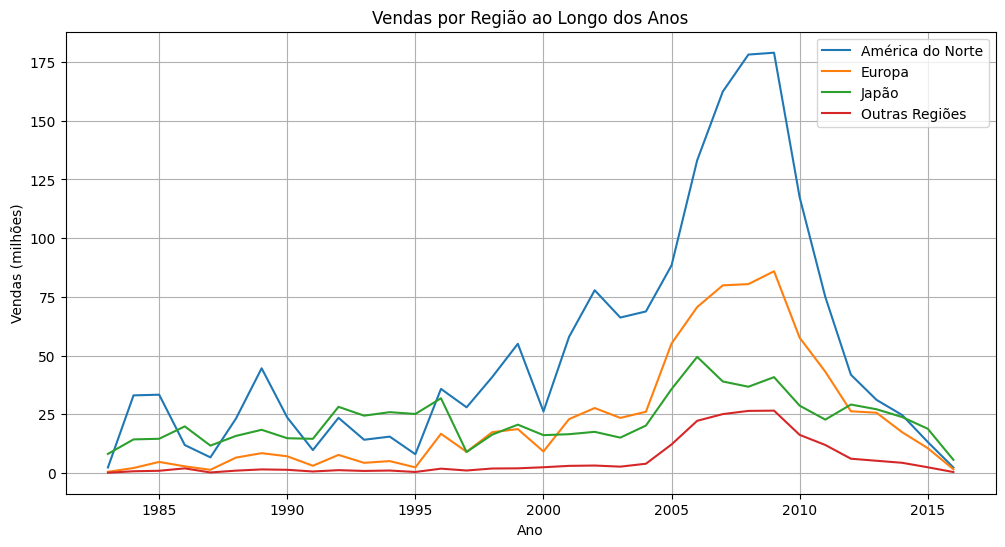

In [15]:
# Vendas ao longo dos anos (por região)

region_sales = ndf.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

region_sales.plot(x='Year', y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], figsize=(12,6))
plt.title('Vendas por Região ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Vendas (milhões)')
plt.grid(True)
plt.legend(["América do Norte", "Europa", "Japão", "Outras Regiões"])
plt.show()

## 4.2 Análise dos gêneros mais populares

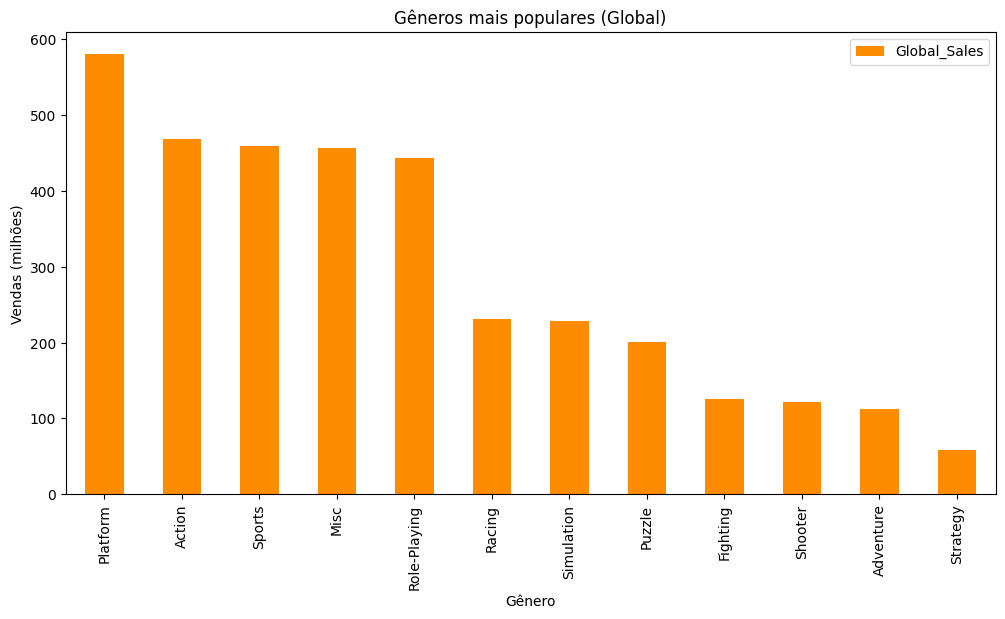

In [16]:
# Gêneros mais populares (Global)

genre_sales = ndf.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

genre_sales[['Global_Sales']].sort_values(by='Global_Sales', ascending=False).plot(kind='bar', figsize=(12,6), color='darkorange')
plt.title('Gêneros mais populares (Global)')
plt.xlabel('Gênero')
plt.ylabel('Vendas (milhões)')
plt.show()

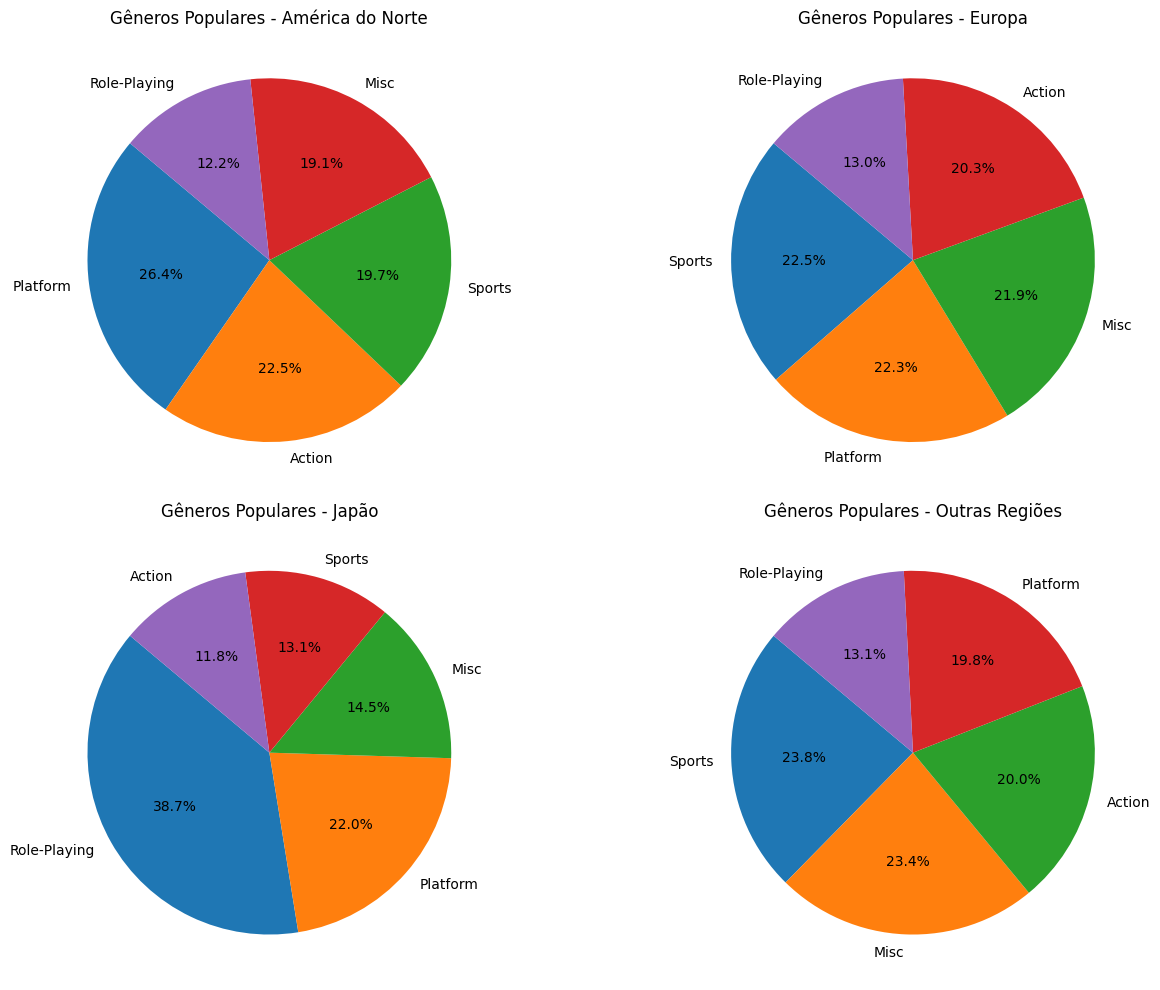

In [17]:
# Agrupa as vendas por gênero em cada região
region_genre_sales = ndf.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Seleciona os gêneros mais populares em cada região
top_na_genres = region_genre_sales['NA_Sales'].nlargest(5)
top_eu_genres = region_genre_sales['EU_Sales'].nlargest(5)
top_jp_genres = region_genre_sales['JP_Sales'].nlargest(5)
top_other_genres = region_genre_sales['Other_Sales'].nlargest(5)

# Configurar os subplots em 2 linhas e 2 colunas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico de pizza para América do Norte
axes[0, 0].pie(top_na_genres, labels=top_na_genres.index, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('Gêneros Populares - América do Norte')

# Gráfico de pizza para Europa
axes[0, 1].pie(top_eu_genres, labels=top_eu_genres.index, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Gêneros Populares - Europa')

# Gráfico de pizza para Japão
axes[1, 0].pie(top_jp_genres, labels=top_jp_genres.index, autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('Gêneros Populares - Japão')

# Gráfico de pizza para Outras Regiões
axes[1, 1].pie(top_other_genres, labels=top_other_genres.index, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('Gêneros Populares - Outras Regiões')

plt.tight_layout()
plt.show()

* **América do Norte:** O gênero Platform é o mais popular, seguido por Action e Sports.
* **Europa:** A popularidade de Sports e Platform são os mais populares, com Misc e Action também entre os mais vendidos.
* **Japão:** Role-Playing domina, com Platform e Misc em destaque.
* **Outras Regiões:** O gênero Sports é o mais popular, seguido por Misc e Action.

## 4.3 Análise do ciclo de vida de cada console

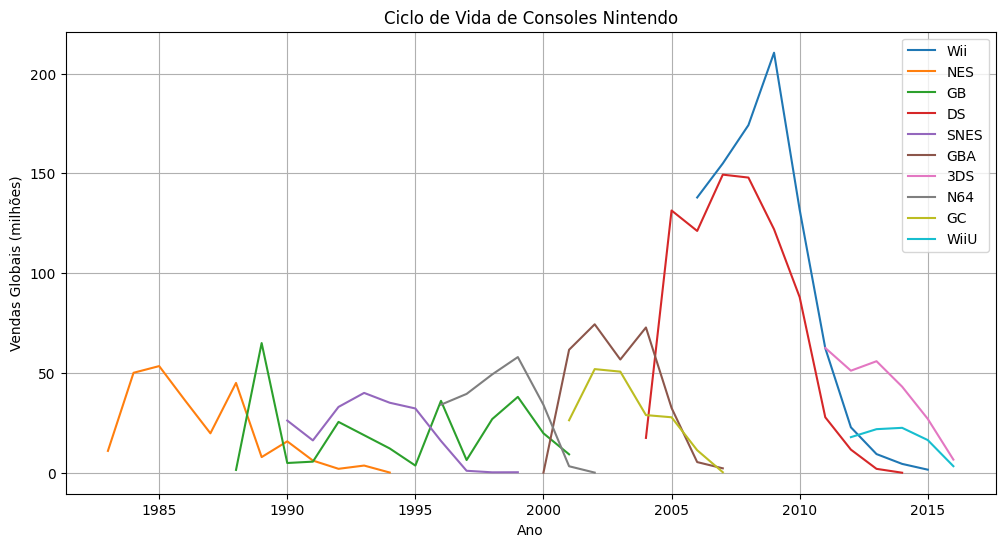

In [18]:
# Ciclo de vida de cada console

platform_life_cycle = ndf.groupby(['Platform', 'Year'])['Global_Sales'].sum().reset_index()
# print(platform_life_cycle)

platforms = ndf['Platform'].unique()
plt.figure(figsize=(12,6))
for platform in platforms:
    platform_data = platform_life_cycle[platform_life_cycle['Platform'] == platform]
    plt.plot(platform_data['Year'], platform_data['Global_Sales'], label=platform)

plt.title('Ciclo de Vida de Consoles Nintendo')
plt.xlabel('Ano')
plt.ylabel('Vendas Globais (milhões)')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Agrupar vendas globais por console e ano.
platform_life_cycle = ndf.groupby(['Platform', 'Year'])['Global_Sales'].sum().reset_index()

# Lista única de consoles
platforms = ndf['Platform'].unique()

# Inicializar o relatório
report = []

# Gerar informações principais para cada console
for platform in platforms:
    platform_data = platform_life_cycle[platform_life_cycle['Platform'] == platform]
    
    # Determinar ano inicial e final de atividade
    start_year = platform_data['Year'].min()
    end_year = platform_data['Year'].max()
    
    # Determinar ano de pico de vendas e o valor
    peak_year = platform_data.loc[platform_data['Global_Sales'].idxmax(), 'Year']
    peak_sales = platform_data['Global_Sales'].max()
    
    # Total de vendas globais no ciclo de vida
    total_sales = platform_data['Global_Sales'].sum()
    
    # Adicionar ao relatório
    report.append({
        'Console': platform,
        'Ano Inicial': start_year,
        'Ano Final': end_year,
        'Ano de Pico': peak_year,
        'Vendas no Pico (milhões)': round(peak_sales, 2),
        'Total de Vendas (milhões)': round(total_sales, 2)
    })

# Converter para um DataFrame para visualização
report_df = pd.DataFrame(report)

# Exibir o relatório
print(report_df)

  Console  Ano Inicial  Ano Final  Ano de Pico  Vendas no Pico (milhões)  \
0     Wii         2006       2015         2009                    210.44   
1     NES         1983       1994         1985                     53.44   
2      GB         1988       2001         1989                     64.98   
3      DS         2004       2014         2007                    149.36   
4    SNES         1990       1999         1993                     40.01   
5     GBA         2000       2007         2002                     74.38   
6     3DS         2011       2016         2011                     62.53   
7     N64         1996       2002         1999                     57.96   
8      GC         2001       2007         2002                     51.93   
9    WiiU         2012       2016         2014                     22.51   

   Total de Vendas (milhões)  
0                     909.81  
1                     251.07  
2                     254.42  
3                     818.60  
4       

- **Console com maior pico de vendas**: O *Wii*, com 210.44 milhões de unidades vendidas em 2009.
- **Console com menor pico de vendas**: O *WiiU*, com 22.51 milhões em 2014.
- **Console com o ciclo de vida mais longo**: O *DS*, com vendas entre 2004 e 2014.
- **Ano de pico mais recente**: O *Wii* com pico em 2009.

## 4.4 Os lançamentos mais bem-sucedidos de cada ano

In [20]:
# Identificando os lançamentos mais bem-sucedidos de cada ano

top_selling_games_per_year = ndf.loc[ndf.groupby('Year')['Global_Sales'].idxmax()]
print(top_selling_games_per_year[['Year', 'Name', 'Global_Sales']])

      Year                                       Name  Global_Sales
421   1983                                   Baseball          3.20
9     1984                                  Duck Hunt         28.31
1     1985                          Super Mario Bros.         40.24
127   1986                        The Legend of Zelda          6.51
251   1987            Zelda II: The Adventure of Link          4.38
22    1988                        Super Mario Bros. 3         17.28
5     1989                                     Tetris         30.26
18    1990                          Super Mario World         20.61
231   1991    The Legend of Zelda: A Link to the Past          4.61
50    1992         Super Mario Land 2: 6 Golden Coins         11.18
57    1993                      Super Mario All-Stars         10.55
71    1994                        Donkey Kong Country          9.30
187   1995  Donkey Kong Country 2: Diddy's Kong Quest          5.15
4     1996                   Pokemon Red/Pokemon

## 4.5 Títulos mais bem-sucedidos

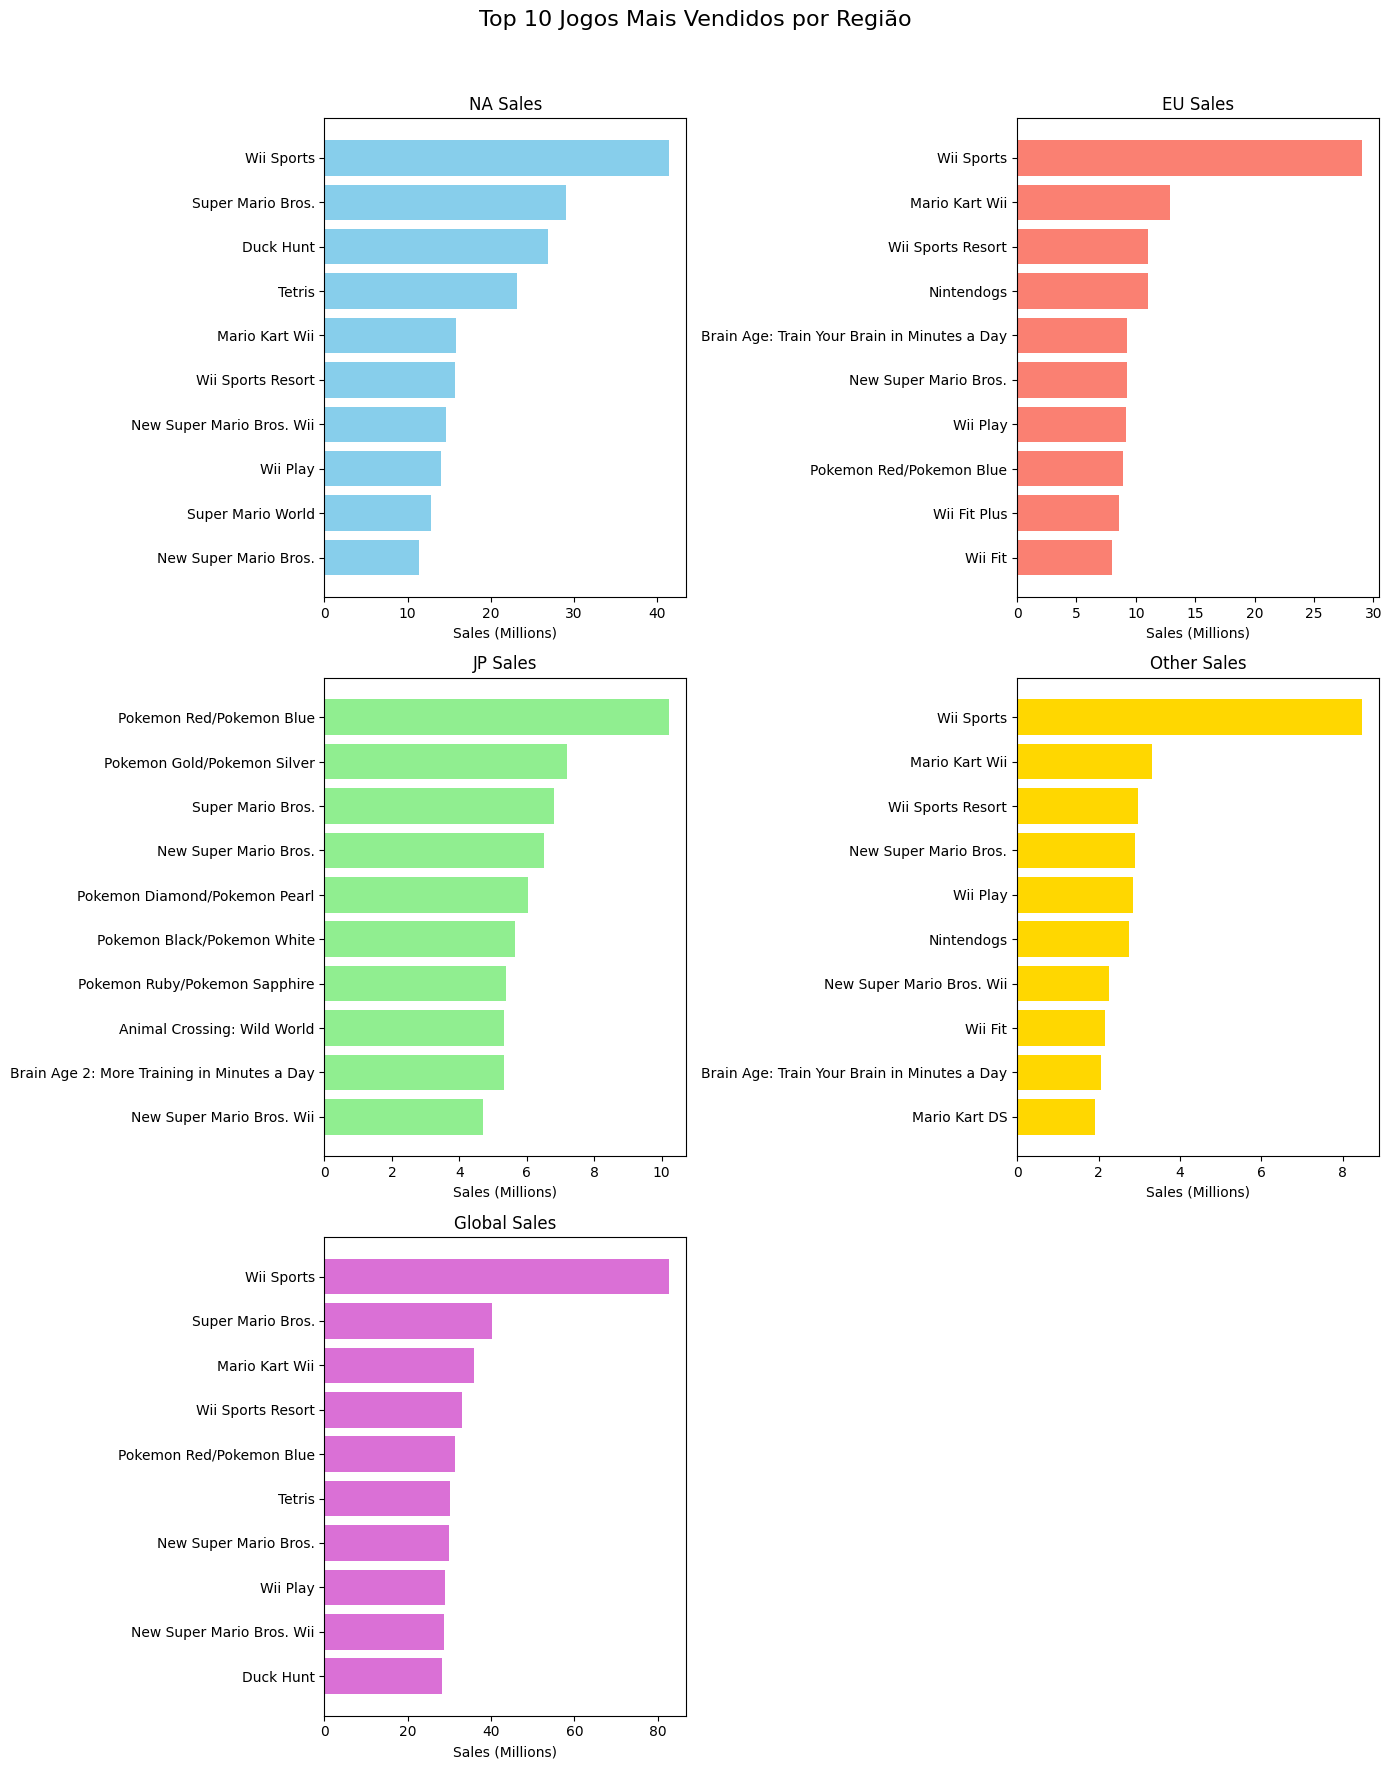

In [21]:
# Seleciona os 10 jogos mais vendidos em cada região
top_na = ndf.nlargest(10, 'NA_Sales')[['Name', 'NA_Sales']]
top_eu = ndf.nlargest(10, 'EU_Sales')[['Name', 'EU_Sales']]
top_jp = ndf.nlargest(10, 'JP_Sales')[['Name', 'JP_Sales']]
top_other = ndf.nlargest(10, 'Other_Sales')[['Name', 'Other_Sales']]
top_global = ndf.nlargest(10, 'Global_Sales')[['Name', 'Global_Sales']]

# Configurar a figura com uma grade de 3x2
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
fig.suptitle("Top 10 Jogos Mais Vendidos por Região", fontsize=16)
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'orchid']
regions_data = [top_na, top_eu, top_jp, top_other, top_global]
titles = ['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales', 'Global Sales']

# Loop para plotar cada região em um subplot
for i, (region_data, title, color) in enumerate(zip(regions_data, titles, colors)):
    ax = axes[i // 2, i % 2]  # Distribui os gráficos em uma grade 3x2
    ax.barh(region_data['Name'], region_data[title.split()[0] + '_Sales'], color=color)
    ax.set_title(title)
    ax.set_xlabel("Sales (Millions)")
    ax.invert_yaxis()  # Inverter para o mais vendido no topo

# Remove o último subplot vazio
if len(regions_data) < 6:
    fig.delaxes(axes[-1, -1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 4.6 Títulos mais vendidos por console

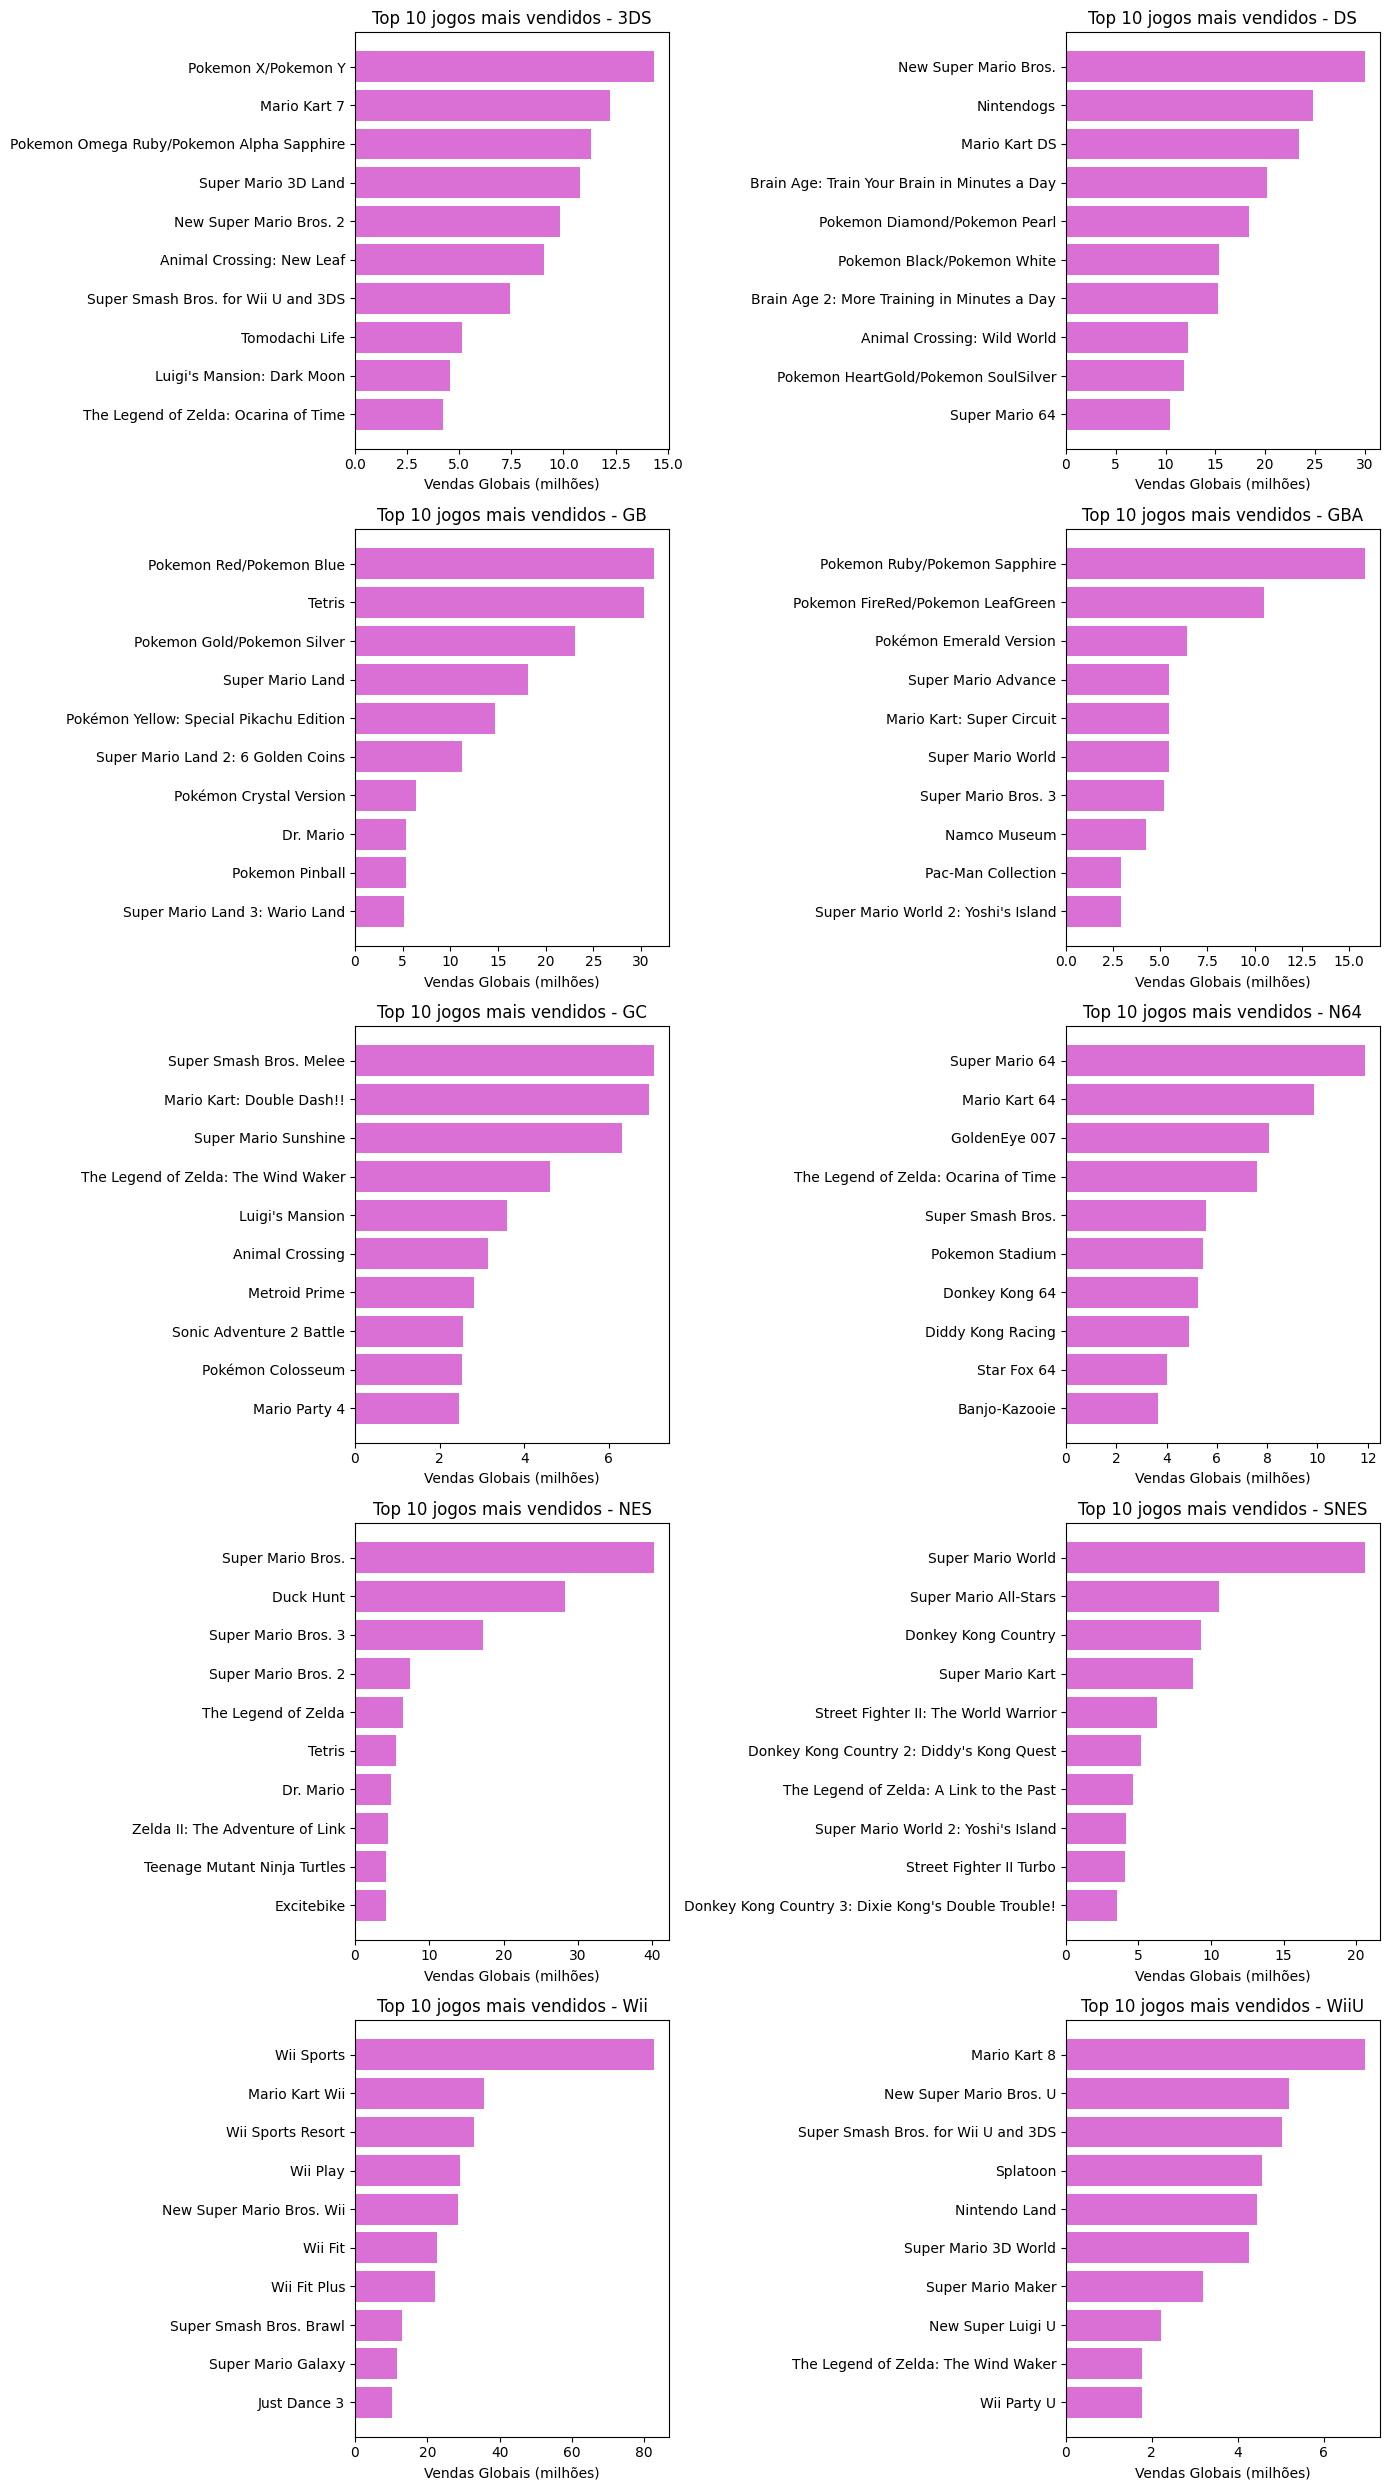

In [22]:
ndf_sorted = ndf.sort_values(by=['Platform', 'Global_Sales'], ascending=[True, False])

# Seleciona os 10 títulos mais vendidos para cada console
top_10_per_console = ndf_sorted.groupby('Platform').head(10)

# Identifica os consoles únicos no dataset
consoles = top_10_per_console['Platform'].unique()

# Número de colunas para os gráficos
n_cols = 2
n_rows = (len(consoles) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5))
axes = axes.flatten()
# Itera sobre cada console e plota os 10 jogos mais vendidos
for i, console in enumerate(consoles):
    console_data = top_10_per_console[top_10_per_console['Platform'] == console]
    
    # Plota gráfico de barras para o console atual
    axes[i].barh(console_data['Name'], console_data['Global_Sales'], color=color)
    axes[i].set_title(f'Top 10 jogos mais vendidos - {console}')
    axes[i].set_xlabel('Vendas Globais (milhões)')
    axes[i].invert_yaxis()  # Inverter para mostrar o maior valor no topo

# Remover quaisquer gráficos vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 5. Aplicação de modelos

## 5.1 Matriz de correlação

Criando uma matriz de correlação para compreender melhor a relação entre as variáveis numéricas, excluindo 'Year' (Ano) que não será usada e nem tem impacto na aplicação dos modelos.

In [23]:
# Seleciona as variáveis numéricas.
numerical_data = ndf[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

# Calcula a matriz.
correlation_matrix = numerical_data.corr()

# Exibe a matriz.
print(correlation_matrix)

              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
NA_Sales      1.000000  0.814476  0.569522     0.795134      0.951705
EU_Sales      0.814476  1.000000  0.570931     0.960040      0.924737
JP_Sales      0.569522  0.570931  1.000000     0.487862      0.721991
Other_Sales   0.795134  0.960040  0.487862     1.000000      0.887977
Global_Sales  0.951705  0.924737  0.721991     0.887977      1.000000


* Global_Sales tem forte correlação positiva com NA_Sales (0.95), EU_Sales (0.93) e Other_Sales (0.88), indicando que essas variáveis influenciam fortemente as vendas globais.
* JP_Sales tem uma correlação moderada com Global_Sales (0.74), mas é mais fraca comparada às outras regiões.
* Ano (Year) tem uma correlação fraca e negativa com todas as variáveis de vendas.

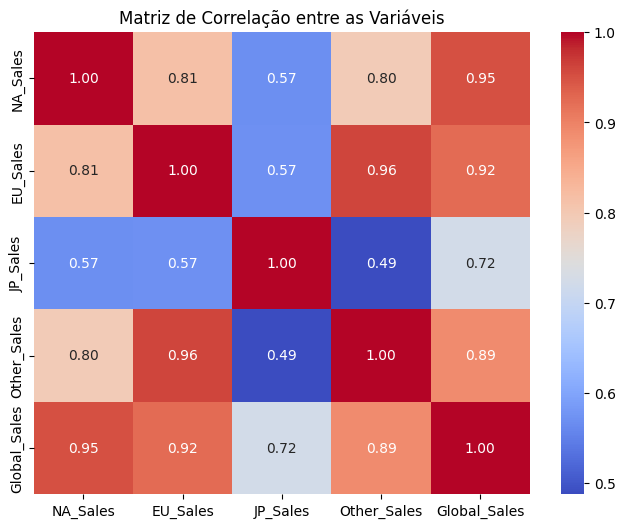

In [24]:
# Visualiza a correlação com um heatmap

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre as Variáveis')
plt.show()

## 5.2 Linear regression

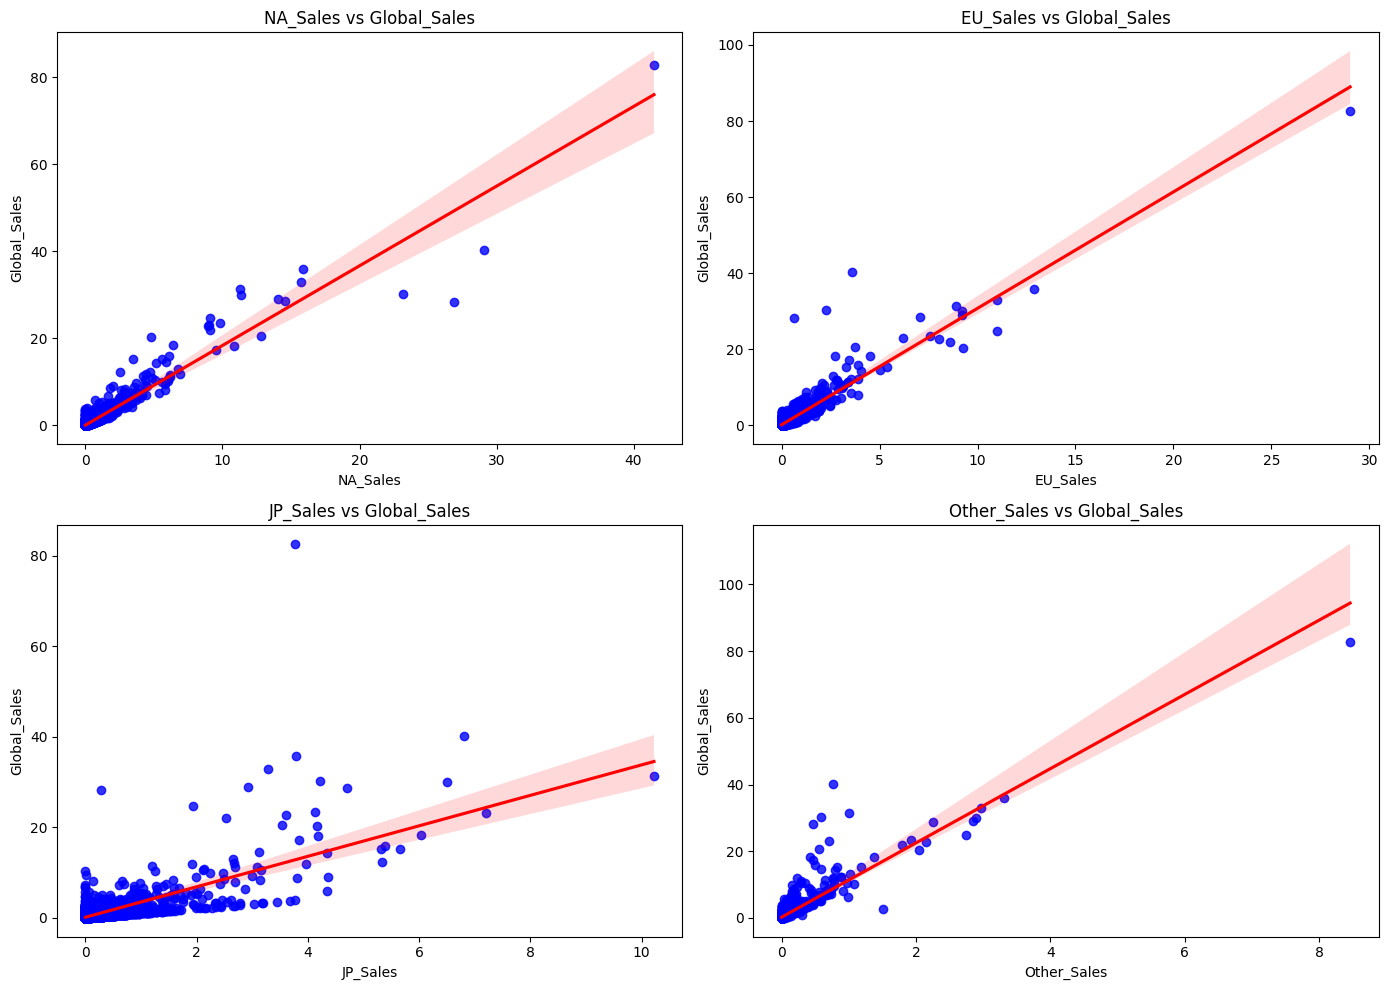

In [25]:
# Cria subplots para exibir os gráficos lado a lado.
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Define as variáveis independentes e o layout dos gráficos.
variables = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
titles = ['NA_Sales vs Global_Sales', 'EU_Sales vs Global_Sales', 'JP_Sales vs Global_Sales', 'Other_Sales vs Global_Sales']

# Cria os gráficos de dispersão com as linhas de regressão.
for i, var in enumerate(variables):
    row, col = divmod(i, 2)  # Organiza os gráficos em 2 linhas e 2 colunas
    sns.regplot(x=var, y='Global_Sales', data=numerical_data, scatter_kws={'color':'blue'}, line_kws={'color':'red'}, ax=axes[row, col])
    axes[row, col].set_title(titles[i])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Global_Sales')

plt.tight_layout() 
plt.show()

In [26]:
# Selecionando variáveis
X = ndf[['NA_Sales', 'JP_Sales', 'EU_Sales']]  # Variáveis independentes
y = ndf['Global_Sales']  # Variável dependente

# Divide os dados em treino e teste (80% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cria o modelo de regressão linear
model_lr2 = LinearRegression()

# Treina o modelo
model_lr2.fit(X_train, y_train)

# Faz previsões com os dados de teste
y_pred = model_lr2.predict(X_test)

In [27]:
# Calcula o MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calcula o MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calcula o R² (coeficiente de determinação)
r2 = r2_score(y_test, y_pred)

# Calcula o accuracy_score
# Arredondando as previsões e os valores reais para as classes mais próximas
y_pred_rounded = np.round(y_pred)
y_test_rounded = np.round(y_test)

accuracy = accuracy_score(y_test_rounded, y_pred_rounded)

# Exibe as métricas
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R²: {r2:.2f}')
print(f'Accuracy Score: {accuracy * 100:.2f}%')

Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.02
R²: 1.00
Accuracy Score: 98.53%


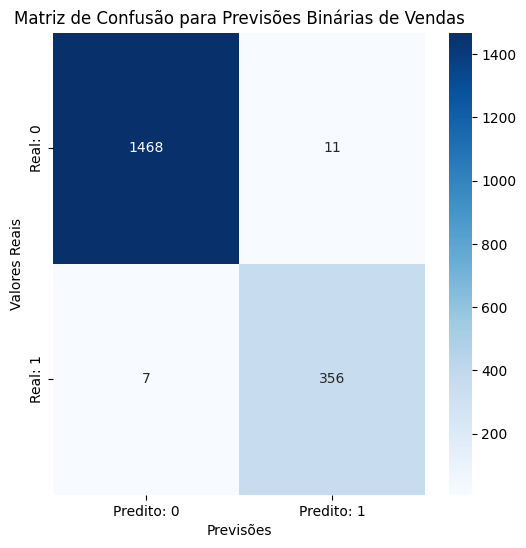

In [28]:
# Limiar (a média das previsões de vendas globais)
threshold = y_pred.mean()

# Criar a coluna binária para as previsões de vendas (somente para o conjunto de teste)
sales_binary_pred = np.where(y_pred > threshold, 1, 0)

# Adicionar a coluna binária no DataFrame de teste (X_test)
X_test['Sales_Binary_Pred'] = sales_binary_pred

# Criar a coluna binária para os valores reais de vendas do conjunto de teste
sales_binary_real = np.where(y_test > threshold, 1, 0)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(sales_binary_real, sales_binary_pred)

# Exibir a matriz de confusão
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predito: 0', 'Predito: 1'], yticklabels=['Real: 0', 'Real: 1'])
plt.title('Matriz de Confusão para Previsões Binárias de Vendas')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()


## 5.3 Decision Tree

In [29]:
# Selecionando variáveis
X = ndf[['NA_Sales', 'EU_Sales', 'JP_Sales']] # Variável independente
y = ndf['Global_Sales'] # Variável dependente

# Divide os dados em treino e teste (80% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cria o modelo de árvore de decisão
model_tree = DecisionTreeRegressor(max_depth=5, random_state=42)

# Treina o modelo
model_tree.fit(X_train, y_train)

# Faz previsões com os dados de teste
y_pred = model_tree.predict(X_test)

In [30]:
# Calcula o MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calcula o MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calcula o R² (coeficiente de determinação)
r2 = r2_score(y_test, y_pred)

# Calcula o accuracy_score
# Arredondando as previsões e os valores reais para as classes mais próximas
y_pred_rounded = np.round(y_pred)
y_test_rounded = np.round(y_test)

accuracy = accuracy_score(y_test_rounded, y_pred_rounded)

# Exibe as métricas
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R²: {r2:.2f}')
print(f'Accuracy Score: {accuracy * 100:.2f}%')

Mean Squared Error (MSE): 0.20
Mean Absolute Error (MAE): 0.17
R²: 0.93
Accuracy Score: 89.52%


In [31]:
# Verificando a importância das variáveis na árvore de decisão
importances = model_tree.feature_importances_

# Exibindo a importância de cada variável
for feature, importance in zip(X.columns, importances):
    print(f'Feature: {feature}, Importance: {importance:.4f}')

Feature: NA_Sales, Importance: 0.8220
Feature: EU_Sales, Importance: 0.1572
Feature: JP_Sales, Importance: 0.0209


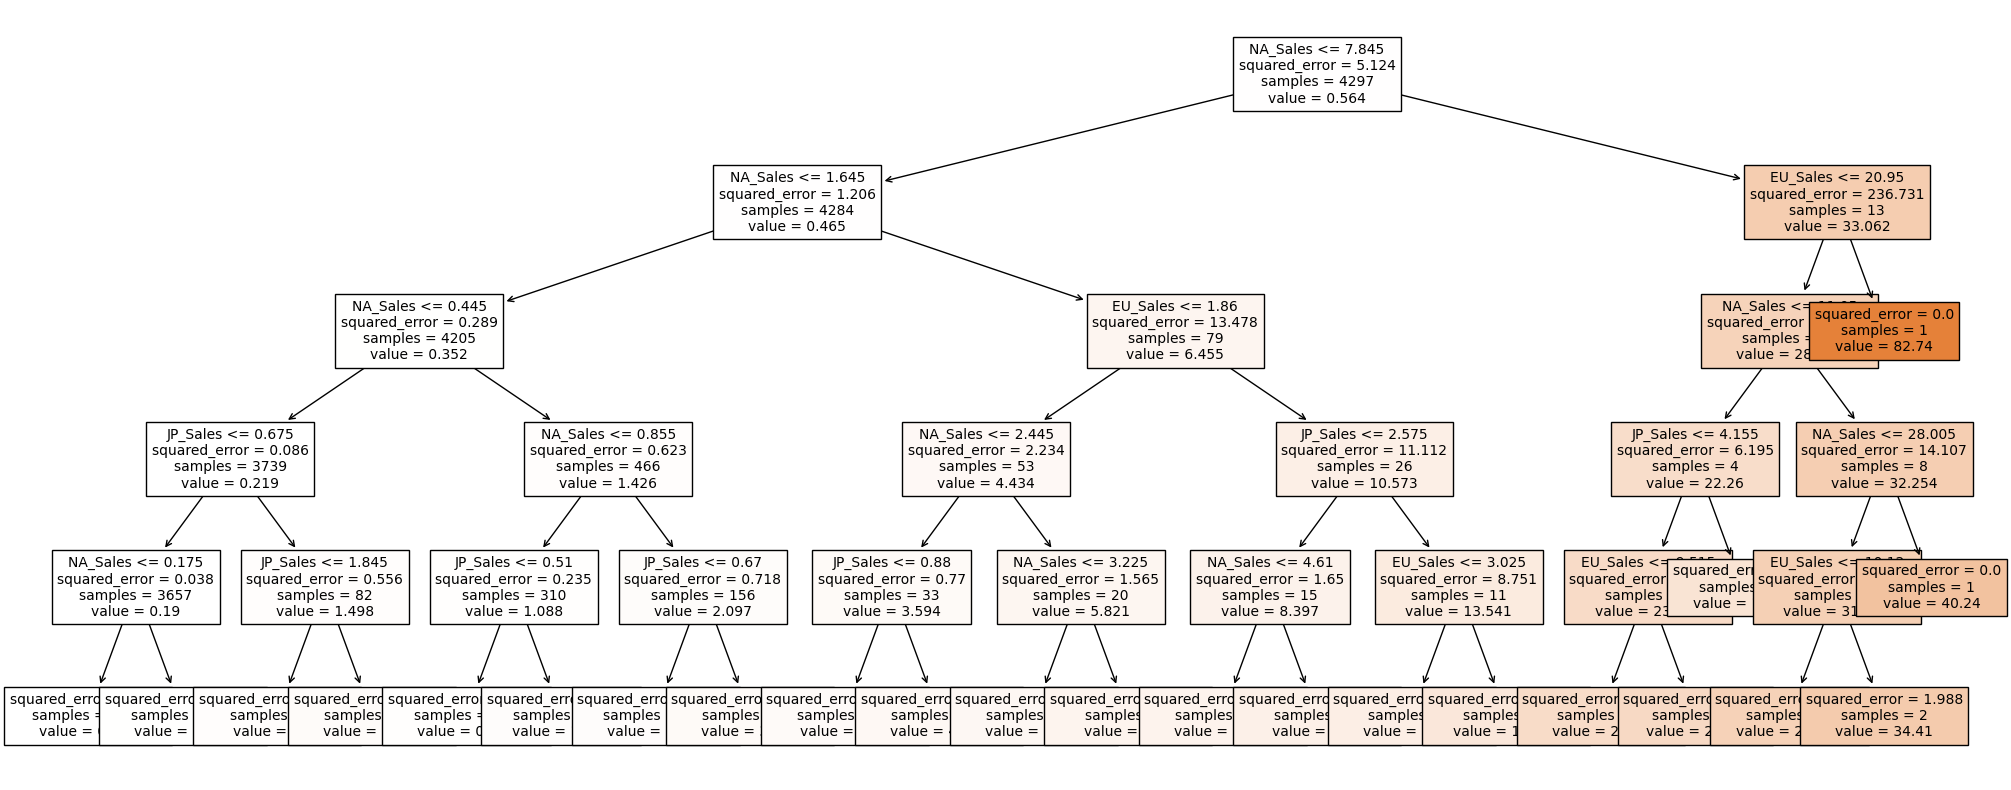

In [32]:
# Plotando a árvore de decisão
plt.figure(figsize=(25, 10))
plot_tree(model_tree, filled=True, feature_names=X.columns, fontsize=10)
plt.show()

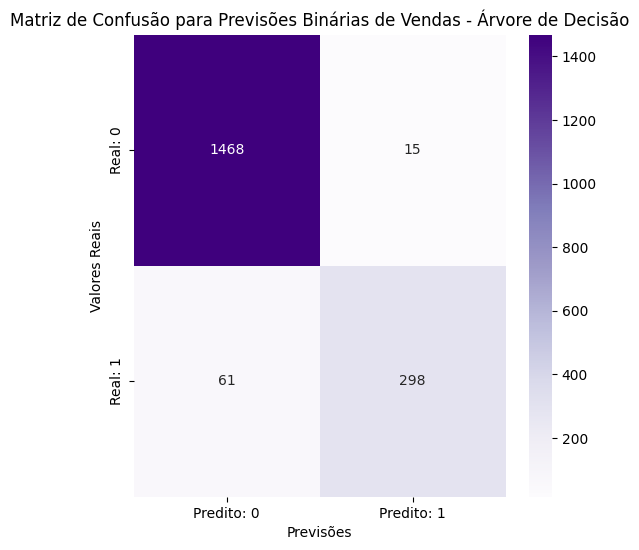

In [33]:
# Limiar para binarizar as previsões e os valores reais
threshold = y_pred.mean()

# Criar a coluna binária para as previsões de vendas (somente para o conjunto de teste)
sales_binary_pred = np.where(y_pred > threshold, 1, 0)

# Criar a coluna binária para os valores reais de vendas do conjunto de teste
sales_binary_real = np.where(y_test > threshold, 1, 0)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(sales_binary_real, sales_binary_pred)

# Exibir a matriz de confusão
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Predito: 0', 'Predito: 1'], yticklabels=['Real: 0', 'Real: 1'])
plt.title('Matriz de Confusão para Previsões Binárias de Vendas - Árvore de Decisão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

## 5.4 Random Forest

In [34]:
# Seleciona as variáveis independentes e dependente.
X = ndf[['NA_Sales', 'EU_Sales', 'JP_Sales']]  # Variáveis independentes
y = ndf['Global_Sales']  # Variável dependente

# Divide os dados em treino (80%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cria o modelo Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treina o modelo
model_rf.fit(X_train, y_train)

# Faz previsões com os dados de teste
y_pred = model_rf.predict(X_test)

In [35]:
# Calcula o MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calcula o MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calcula o R² (coeficiente de determinação)
r2 = r2_score(y_test, y_pred)

# Calcula o accuracy_score
# Arredondando as previsões e os valores reais para as classes mais próximas
y_pred_rounded = np.round(y_pred)
y_test_rounded = np.round(y_test)

accuracy = accuracy_score(y_test_rounded, y_pred_rounded)

# Exibe as métricas
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R²: {r2:.2f}')
print(f'Accuracy Score: {accuracy * 100:.2f}%')

Mean Squared Error (MSE): 0.06
Mean Absolute Error (MAE): 0.03
R²: 0.98
Accuracy Score: 97.34%


In [36]:
# Exibie a importância de cada variável
for feature, importance in zip(X.columns, importances):
    print(f'Feature: {feature}, Importance: {importance:.4f}')

Feature: NA_Sales, Importance: 0.8220
Feature: EU_Sales, Importance: 0.1572
Feature: JP_Sales, Importance: 0.0209


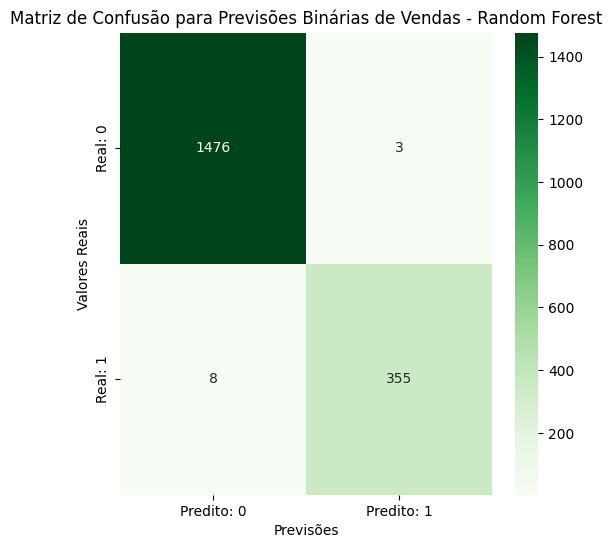

In [37]:
# Limiar para binarizar as previsões e os valores reais
threshold = y_pred.mean()

# Criar a coluna binária para as previsões de vendas (somente para o conjunto de teste)
sales_binary_pred = np.where(y_pred > threshold, 1, 0)

# Criar a coluna binária para os valores reais de vendas do conjunto de teste
sales_binary_real = np.where(y_test > threshold, 1, 0)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(sales_binary_real, sales_binary_pred)

# Exibir a matriz de confusão
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predito: 0', 'Predito: 1'], yticklabels=['Real: 0', 'Real: 1'])
plt.title('Matriz de Confusão para Previsões Binárias de Vendas - Random Forest')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

## 5.5 KNN (K-Nearest Neighbors)

In [38]:
# Seleciona variáveis independentes e dependentes
X = ndf[['EU_Sales', 'NA_Sales', 'JP_Sales']]  # Variáveis independentes
y = ndf['Global_Sales']  # Variável dependente

# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliza os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cria o modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)  
knn.fit(X_train_scaled, y_train)

# Faz previsões
y_pred = knn.predict(X_test_scaled)

In [39]:
# Calcula o MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calcula o MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calcula o R² (coeficiente de determinação)
r2 = r2_score(y_test, y_pred)

# Calcula o accuracy_score
# Arredondando as previsões e os valores reais para as classes mais próximas
y_pred_rounded = np.round(y_pred)
y_test_rounded = np.round(y_test)

accuracy = accuracy_score(y_test_rounded, y_pred_rounded)

# Exibe as métricas
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R²: {r2:.2f}')
print(f'Accuracy Score: {accuracy * 100:.2f}%')

Mean Squared Error (MSE): 0.06
Mean Absolute Error (MAE): 0.04
R²: 0.98
Accuracy Score: 96.91%


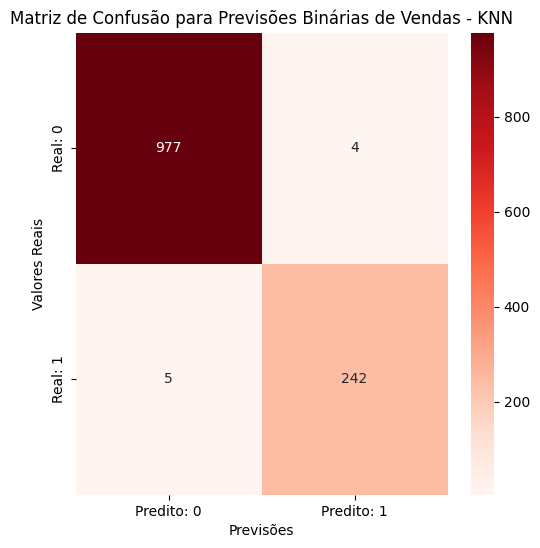

In [40]:
# Limiar para binarizar as previsões e os valores reais (usando a média como limiar)
threshold = y_pred.mean()

# Criar a coluna binária para as previsões de vendas (somente para o conjunto de teste)
sales_binary_pred = np.where(y_pred > threshold, 1, 0)

# Criar a coluna binária para os valores reais de vendas do conjunto de teste
sales_binary_real = np.where(y_test > threshold, 1, 0)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(sales_binary_real, sales_binary_pred)

# Exibir a matriz de confusão
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Predito: 0', 'Predito: 1'], yticklabels=['Real: 0', 'Real: 1'])
plt.title('Matriz de Confusão para Previsões Binárias de Vendas - KNN')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

## 5.6 MLP (Multi Layer Perceptron)

In [41]:
# Seleciona variáveis independentes e dependentes
X = ndf[['EU_Sales', 'NA_Sales', 'JP_Sales']]  # Variáveis independentes
y = ndf['Global_Sales']  # Variável dependente

# Dividinde os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando o modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Treinando o modelo
mlp.fit(X_train, y_train)

# Faz previsões com os dados de teste
y_pred = mlp.predict(X_test)

In [42]:
# Calcula o MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calcula o MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calcula o R² (coeficiente de determinação)
r2 = r2_score(y_test, y_pred)

# Calcula o accuracy_score
# Arredondando as previsões e os valores reais para as classes mais próximas
y_pred_rounded = np.round(y_pred)
y_test_rounded = np.round(y_test)

accuracy = accuracy_score(y_test_rounded, y_pred_rounded)

# Exibe as métricas
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R²: {r2:.2f}')
print(f'Accuracy Score: {accuracy * 100:.2f}%')

Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.02
R²: 1.00
Accuracy Score: 98.05%


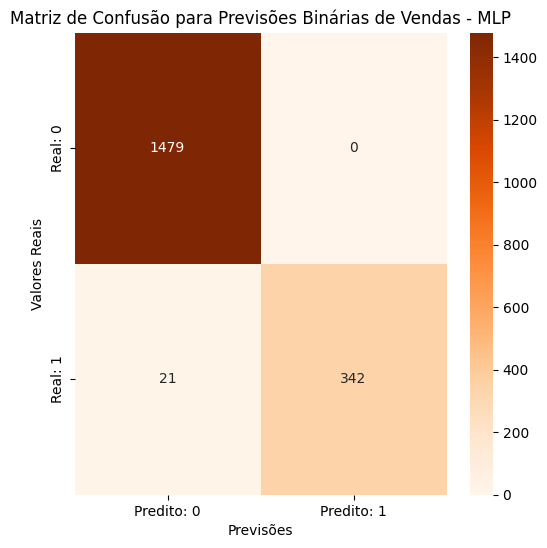

In [43]:
# Limiar para binarizar as previsões e os valores reais (usando a média como limiar)
threshold = y_pred.mean()

# Criar a coluna binária para as previsões de vendas (somente para o conjunto de teste)
sales_binary_pred = np.where(y_pred > threshold, 1, 0)

# Criar a coluna binária para os valores reais de vendas do conjunto de teste
sales_binary_real = np.where(y_test > threshold, 1, 0)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(sales_binary_real, sales_binary_pred)

# Exibir a matriz de confusão
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Predito: 0', 'Predito: 1'], yticklabels=['Real: 0', 'Real: 1'])
plt.title('Matriz de Confusão para Previsões Binárias de Vendas - MLP')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()